In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

dataset = pd.read_csv("//home//lydianjay//Documents//Data mining//dataset//penguins.csv")
dataset.replace('NA', np.nan, inplace = True)
dataset.replace(' ', np.nan, inplace = True)
dataset.dropna( inplace = True, how = 'any')
dataset = dataset[dataset.sex != '.']
x = dataset[ ["body_mass_g", "flipper_length_mm", "bill_length_mm"] ].loc[ dataset["species"] == "Gentoo"]

y = dataset["sex"].loc[ dataset["species"] == "Gentoo" ] # target

In [2]:
dataset.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['male', 'female'])
print(report)

              precision    recall  f1-score   support

        male       0.86      0.96      0.91        52
      female       0.96      0.86      0.91        56

    accuracy                           0.91       108
   macro avg       0.91      0.91      0.91       108
weighted avg       0.91      0.91      0.91       108



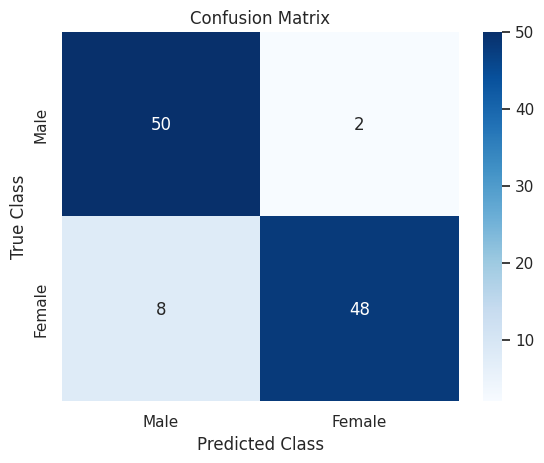

In [18]:
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 12}, cmap='Blues', fmt='g', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()
